In [ ]:
!pip install datasets==2.5.0 # https://github.com/huggingface/datasets/issues/5111
!pip install matplotlib==3.5.3 # Need >=3.5.0 https://stackoverflow.com/questions/21910986/why-set-xticks-doesnt-set-the-labels-of-ticks
!git clone https://huggingface.co/datasets/bigscience/evaluation-results

# RESTART RUNTIME #

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 4.6 MB/s 
     |████████████████████████████████| 163 kB 48.9 MB/s 
     |████████████████████████████████| 95 kB 2.8 MB/s 
     |████████████████████████████████| 212 kB 48.8 MB/s 
     |████████████████████████████████| 115 kB 63.0 MB/s 
     |████████████████████████████████| 127 kB 45.9 MB/s 
     |████████████████████████████████| 115 kB 53.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.9 MB/s 
     |████████████████████████████████

Cloning into 'evaluation-results'...
remote: Enumerating objects: 86352, done.
remote: Counting objects: 100% (86352/86352), done.
remote: Compressing objects: 100% (16829/16829), done.
remote: Total 86352 (delta 40232), reused 84197 (delta 38683), pack-reused 0
Receiving objects: 100% (86352/86352), 37.92 MiB | 9.78 MiB/s, done.
Resolving deltas: 100% (40232/40232), done.
Checking out files: 100% (45906/45906), done.


In [ ]:
from datasets.utils.logging import set_verbosity_error
set_verbosity_error()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
res = pd.read_csv(f"/content/evaluation-results/bloomz-ckpts/evaluation_249/merged.csv")

In [ ]:
res.loc[(res["metric"] == "bleu") & (res["prompt"] == "median")]["value"].mean()

0.13769660545545256

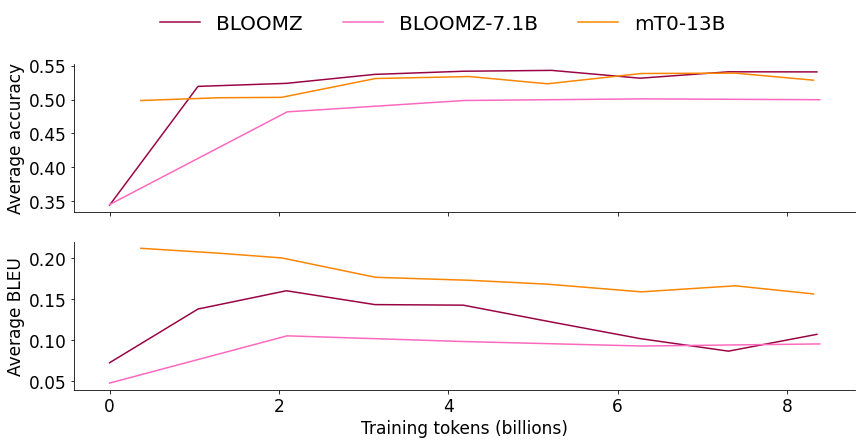

In [ ]:
# Inspired by Figure 4 from https://arxiv.org/abs/2201.10005
# https://coolors.co/palette/8ecae6-219ebc-023047-ffb703-fb8500


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig, axes = plt.subplots(figsize=(14, 6), facecolor='w', nrows=2, edgecolor='k', sharex=True)

color_map = {
    'mT5 XXL': '#c7a012',
    'mT0-13B': '#FB8500',
    'BLOOM-7.1B': '#5440ed', 
    'BLOOMZ-7.1B': '#fc68be', 
    'BLOOM': '#12009e', 
    'BLOOMZ-P3': '#7800ab', 
    'BLOOMZ': '#990344', 
    #'GPT-3 (175B)': '#7b241c', 
    #'T5+LM (11B)': '#2874a6 ', 
}

x_steps = [0, 249, 498, 747, 996, 1245, 1494, 1743, 1992]
x_toks = [x * 4194304 for x in x_steps]
y_gen, y_nlu = [], []

for step in x_steps:
    if step == 0:
        res = pd.read_csv(f"/content/evaluation-results/bloom/bloomzeval/transformers/evaluation_val/merged.csv")
    else:
        res = pd.read_csv(f"/content/evaluation-results/bloomz-ckpts/evaluation_{step}/merged.csv")
    y_gen.append(res.loc[(res["metric"] == "bleu") & (res["prompt"] == "median")]["value"].mean())
    y_nlu.append(res.loc[(res["metric"] == "accuracy") & (res["prompt"] == "median")]["value"].mean())

model = "BLOOMZ"
axes[0].plot(x_toks, y_nlu, label=model, color=color_map[model])
axes[1].plot(x_toks, y_gen, label=model, color=color_map[model])


x_steps = [0, 500, 1000, 1500, 2000]
x_toks = [x * 4194304 for x in x_steps]
y_gen, y_nlu = [], []

for step in x_steps:
    if step == 0:
        res = pd.read_csv(f"/content/evaluation-results/bloom-7b1/bloomzeval/transformers/evaluation_val/merged.csv")
    else:
        res = pd.read_csv(f"/content/evaluation-results/bloomz-7b1-ckpts/evaluation_{step}/merged.csv")
    y_gen.append(res.loc[(res["metric"] == "bleu") & (res["prompt"] == "median")]["value"].mean())
    y_nlu.append(res.loc[(res["metric"] == "accuracy") & (res["prompt"] == "median")]["value"].mean())

model = "BLOOMZ-7.1B"
axes[0].plot(x_toks, y_nlu, label=model, color=color_map[model])
axes[1].plot(x_toks, y_gen, label=model, color=color_map[model])


x_steps = [2000, 7000, 11000, 17000, 23000, 28000, 34000, 40000, 45000]
x_toks = [x * 184743.5 for x in x_steps]

y_gen, y_nlu = [], []

for step in x_steps:
    #if step == 0:
    #    res = pd.read_csv(f"/content/evaluation-results/mt5-xxl/bloomzeval/transformers/evaluation_val/merged.csv")
    #else:
    res = pd.read_csv(f"/content/evaluation-results/mt0-xxl-ckpts/evaluation_{step + 1000000}/merged.csv")
    y_gen.append(res.loc[(res["metric"] == "bleu") & (res["prompt"] == "median")]["value"].mean())
    y_nlu.append(res.loc[(res["metric"] == "accuracy") & (res["prompt"] == "median")]["value"].mean())

model = "mT0-13B"
axes[0].plot(x_toks, y_nlu, label=model, color=color_map[model])
axes[1].plot(x_toks, y_gen, label=model, color=color_map[model])

for item in ([axes[0].xaxis.label, axes[0].yaxis.label] +
      axes[0].get_xticklabels() + axes[0].get_yticklabels()):
  item.set_fontsize(17)
for item in ([axes[1].xaxis.label, axes[1].yaxis.label] +
      axes[1].get_xticklabels() + axes[1].get_yticklabels()):
  item.set_fontsize(17)

axes[1].set_ylabel("Average BLEU")
axes[0].set_ylabel("Average accuracy")

# axes[1].set_xticks(x_steps, [round((x * 4194304) / 1_000_000_000, 2) for x in x_steps])
axes[1].set_xlabel("Training tokens (billions)")


axes[1].set_xticks([x * 1_000_000_000 for x in [0, 2, 4, 6, 8]], [x for x in [0, 2, 4, 6, 8]])

# Add grids
#axes[0].grid()
#axes[1].grid()

axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)


axes[0].legend(
    frameon=False,
    ncol=3,
    loc=(0.10, 1.15),
    fontsize=20,
)


plt.savefig('validation.pdf', dpi=300, bbox_inches='tight')
plt.show()
